In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
plt.rcParams['font.family'] = 'NanumGothic'

# OECD 국가들의 사고율, 사망율 비교
- 사고 건수 등 필요값에 결측치가 있는 국가들은 제거

In [3]:
df = pd.read_excel('./2018_해외국가사고율비교/OECD국가교통사고비교(2018년).xls', header=1)

In [4]:
df

,국가,인구수(천명),자동차등록대수(천대),사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,자동차1만대당사망자순위
0,호주,24898.153,19173.279,-,1136,4.6,0.6,18
1,독일,83124.413,56459,308721,3275,3.9,0.6,19
2,그리스,10522.244,9522,10743,700,6.7,0.7,13
3,헝가리,9707.502,4417.848,16951,633,6.5,1.4,2
4,아이슬란드,336.712,337,868,18,5.3,0.5,20
5,아일랜드,4818.694,2717.722,-,143,3,0.5,22
6,이탈리아,60627.291,54256.37,172344,3325,5.5,0.6,15
7,일본,127202.190,91468.471,430601,4166,3.3,0.5,27
8,룩셈부르크,604.244,-,-,36,6,-,-
9,멕시코,126190.782,-,-,-,-,-,-


## 데이터 전처리

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   국가            34 non-null     object 
 1   인구수(천명)       33 non-null     float64
 2   자동차등록대수(천대)   33 non-null     object 
 3   사고건수          33 non-null     object 
 4   사망자수(명)       33 non-null     object 
 5   인구10만명당사망자수   33 non-null     object 
 6   자동차1만대당사망자수   33 non-null     object 
 7   자동차1만대당사망자순위  33 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.2+ KB


In [6]:
df['인구수'] = df['인구수(천명)'] * 1000
df['자동차등록대수'] = df['자동차등록대수(천대)'] * 1000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   국가            34 non-null     object 
 1   인구수(천명)       33 non-null     float64
 2   자동차등록대수(천대)   33 non-null     object 
 3   사고건수          33 non-null     object 
 4   사망자수(명)       33 non-null     object 
 5   인구10만명당사망자수   33 non-null     object 
 6   자동차1만대당사망자수   33 non-null     object 
 7   자동차1만대당사망자순위  33 non-null     object 
 8   인구수           33 non-null     float64
 9   자동차등록대수       33 non-null     object 
dtypes: float64(2), object(8)
memory usage: 2.8+ KB


### G20 국가만 걸러내기

In [8]:
G20_list = ['미국', '캐나다', '사우디아라비아', '호주', '러시아', '인도', '터키', '남아프리카공화국', '브라질', '아르헨티나', '멕시코', '영국', '프랑스', '독일', '이탈리아', '대한민국', '일본', '중국', '인도네시아']
OECD_list = list(df['국가'].values)

# 비교국가 리스트(G20_list와 OECD_list의 교집합)
com_nation_list = list(set(G20_list)&set(OECD_list))
print(com_nation_list)

['캐나다', '이탈리아', '영국', '호주', '프랑스', '대한민국', '독일', '미국', '터키', '멕시코', '일본']


In [9]:
mask = []
for i in df['국가']:
    mask.append(i in com_nation_list)

In [10]:
mask

[True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False]

In [11]:
df_com = df[mask]

In [12]:
df_com

,국가,인구수(천명),자동차등록대수(천대),사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수,자동차1만대당사망자순위,인구수,자동차등록대수
0,호주,24898.153,19173.279,-,1136,4.6,0.6,18,24898153.0,19173279.0
1,독일,83124.413,56459,308721,3275,3.9,0.6,19,83124413.0,56459000
6,이탈리아,60627.291,54256.37,172344,3325,5.5,0.6,15,60627291.0,54256370.0
7,일본,127202.190,91468.471,430601,4166,3.3,0.5,27,127202190.0,91468471.0
9,멕시코,126190.782,-,-,-,-,-,-,126190782.0,----------------------------------------------...
17,대한민국,51606.633,26990.456,217148,3781,7.3,1.4,3,51606633.0,26990456.0
22,터키,82340.090,-,186832,6675,8.1,-,-,82340090.0,----------------------------------------------...
23,영국,67141.678,39365.027,128207,1837,2.7,0.5,26,67141678.0,39365027.0
24,미국,327096.263,297043,-,36750,11.2,1.2,4,327096263.0,297043000
27,캐나다,37074.558,25060.399,-,1922,5.2,0.8,11,37074558.0,25060399.0


In [13]:
# 엑셀 파일로 만들어서 유경님 드리기
df_sample = df[df['국가']=='스웨덴']

In [14]:
df = df.replace('-', np.nan)

In [15]:
df.isnull().sum()

국가               0
인구수(천명)          1
자동차등록대수(천대)      6
사고건수            13
사망자수(명)          2
인구10만명당사망자수      2
자동차1만대당사망자수      6
자동차1만대당사망자순위     6
인구수              1
자동차등록대수          1
dtype: int64

In [16]:
df['사고건수'].dropna()

1     308721.0
2      10743.0
3      16951.0
4        868.0
6     172344.0
7     430601.0
11     36846.0
12     11690.0
14     31674.0
17    217148.0
18    102299.0
19     14233.0
20     18033.0
21     38455.0
22    186832.0
23    128207.0
25      1469.0
26     12557.0
29     21889.0
31      4288.0
32     55766.0
Name: 사고건수, dtype: float64

In [18]:
df = df.dropna(subset=['사고건수'])

In [19]:
df['자동차등록대수'] = df['자동차등록대수(천대)'] * 1000

C:\Users\82103\AppData\Local\Temp\ipykernel_8676\3817755796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['자동차등록대수'] = df['자동차등록대수(천대)'] * 1000


In [20]:
df.reset_index(inplace = True, drop=True)

In [22]:
df_result = df[['국가', '인구수', '자동차등록대수', '사고건수', '사망자수(명)', '인구10만명당사망자수', '자동차1만대당사망자수']]

In [23]:
df_result

,국가,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수
0,독일,83124413.0,56459000.0,308721.0,3275.0,3.9,0.6
1,그리스,10522244.0,9522000.0,10743.0,700.0,6.7,0.7
2,헝가리,9707502.0,4417848.0,16951.0,633.0,6.5,1.4
3,아이슬란드,336712.0,337000.0,868.0,18.0,5.3,0.5
4,이탈리아,60627291.0,54256370.0,172344.0,3325.0,5.5,0.6
5,일본,127202190.0,91468471.0,430601.0,4166.0,3.3,0.5
6,오스트리아,8891383.0,6771395.0,36846.0,409.0,4.6,0.6
7,뉴질랜드,4743131.0,3975359.0,11690.0,377.0,7.9,0.9
8,폴란드,37921585.0,30801000.0,31674.0,2862.0,7.5,0.9
9,대한민국,51606633.0,26990456.0,217148.0,3781.0,7.3,1.4


### 숫자형 데이터들의 형 변환

In [34]:
df_list = ['인구수', '자동차등록대수', '사고건수', '사망자수(명)']
for col in df_list:
    df_result[col] = df_result[col].astype('int')

C:\Users\82103\AppData\Local\Temp\ipykernel_8676\3890017295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[col] = df_result[col].astype('int')


In [35]:
# 결측치 행 제거
df_result = df_result.dropna()

In [36]:
df_result.reset_index(drop=True, inplace=True)

In [37]:
df_result

,국가,인구수,자동차등록대수,사고건수,사망자수(명),인구10만명당사망자수,자동차1만대당사망자수
0,독일,83124413,56459000,308721,3275,3.9,0.6
1,그리스,10522244,9522000,10743,700,6.7,0.7
2,헝가리,9707502,4417848,16951,633,6.5,1.4
3,아이슬란드,336712,337000,868,18,5.3,0.5
4,이탈리아,60627291,54256370,172344,3325,5.5,0.6
5,일본,127202190,91468471,430601,4166,3.3,0.5
6,오스트리아,8891383,6771395,36846,409,4.6,0.6
7,뉴질랜드,4743131,3975359,11690,377,7.9,0.9
8,폴란드,37921585,30801000,31674,2862,7.5,0.9
9,대한민국,51606633,26990456,217148,3781,7.3,1.4


In [38]:
df_ = df_result.sort_values(by='인구10만명당사망자수')

단순 사고 건수 비교

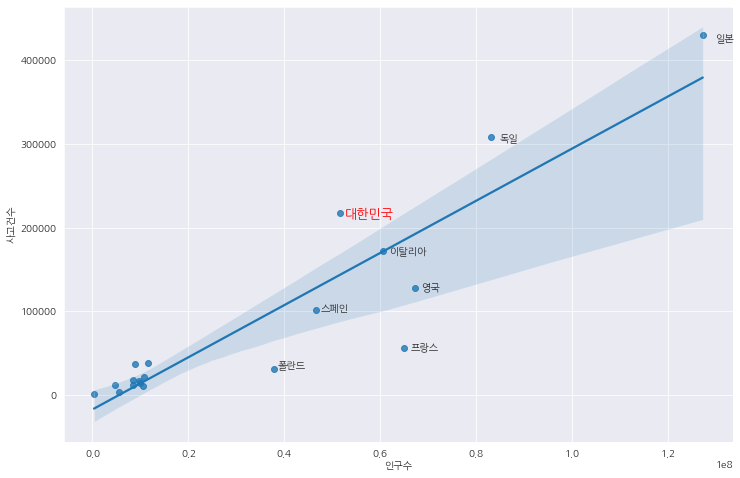

In [53]:
plt.figure(figsize=(12,8))
sns.regplot(x='인구수', y='사고건수', data=df_result)
for n in range(len(df_result)):
    if df_result['인구수'][n] > 20000000:
        if df_result['국가'][n] == '대한민국':
            plt.text(df_result['인구수'][n]*1.02, df_result['사고건수'][n]*0.98,
                     df_result['국가'][n], fontsize=13, color='red')
        else:
            plt.text(df_result['인구수'][n]*1.02, df_result['사고건수'][n]*0.98,
                 df_result['국가'][n], fontsize=10)
plt.show()

### 분석결과 : 인구수와 사고건수는 상관 관계를 가진다,
- 대한민국은 그 상관관계를 넘어서는 수준의 인구수 대비 사고 건수가 나타난다.